## Compuational Biology Assingment 1 - Annika Stechemesser

### Task 1

#### In this Question we implement the Needleman-Wunsch algorithm and use that implementation to compute an optimal alignment of the sequences S1 and S2 with respect to the given scoring function. The sequences as well as the functions can easily be changed by the user and the programme will still work correctly. 

In [246]:
using PyPlot;

INFO: Recompiling stale cache file /home/annika/.juliapro-0.6.2.1/lib/v0.6/PyPlot.ji for module PyPlot.


#### First we input the given sequences (called S1 and S2) and define the scoring function. Before the scoring function calculates the appropriate score of the input, it checks if the input is valid as we only consider characters from the alphabet $\mathbf{\Gamma^*=\{A,T,G,C,-\}}$.

In [248]:
### Input the sequences

S1="GGGCTCCCCTAAGGCATTGGACCCATCGCCGCGTCTTTTATTTTTTGCAAAGT"
S2="CAGTGGACGCATCGCCGCGTCTTATATTAATTGCAAAGTTGGAGTTACCCGCT";

In [1]:
function score(x::Char,y::Char)
    Alphabet="ATGC-"
    if search(Alphabet,x) ==0 || search(Alphabet,y)==0        ### check if the input is valid
        println("Invalid input - not a nucleotide/gap!")
    else
           if x==y                                            ### if yes, compute the score. 
                return 1
            elseif x=='-'
                return -0.5
            elseif y=='-'
                return -0.5
                else 
                    return 0
            end
    end
end

score (generic function with 1 method)

#### Next the source code for the algorithm is provided. The matrix S is the scoring matrix. In addition we introduce the matrix "Trace" whose entries indicate from which direction they where reached ( 1 - diagonal, 2 - down, 3 - right). The direction obviously corresponds to the case the algorithm chooses. The matrix "Trace" essentially replaces pointers here (as pointers are not the most convenient choise in Julia). It will make it possible to find the optimal path in the Needleman-Wunsch table.

In [250]:
### Algorithm

u=length(S1)   ###u is the length of S1
v=length(S2)   ### v is the length of S2

S=zeros(u+1,v+1)  ### initiate the scoring matrix, dimensions u+1,v+1 (as we need to consider the "empty" entry)
Trace=zeros(u+1,v+1)   ### initiate the Trace matrix
Trace[1,:]=3     ### set the first row to be "right" (as right is the only possibility to reach these entries)
Trace[:,1]=2     ### set the first column to be "down" (as down is the only possibility to reach these entries)
S[1,1]=0        ### set the first diagonal element of the scoring matrix to be 0


# The idices are slightly different from the algorithm in the lecture due to the reason that julia starts to index at 1 
# and not at 0. Also we have a spare row in the matrix but not in the sequence.

for i=2:u+1
    S[i,1]=S[i-1,1]+score(S1[i-1],'-')
end 

for j=2:v+1
    S[1,j]=S[1,j-1]+score('-',S2[j-1])
end 

for i=2:u+1
    for j=2:v+1
        S[i,j]=max(S[i-1,j-1]+score(S1[i-1],S2[j-1]), S[i-1,j]+score(S1[i-1],'-'),S[i,j-1]+score('-',S2[j-1]))
        if S[i,j]==S[i-1,j-1]+score(S1[i-1],S2[j-1])
            Trace[i,j]=1
        elseif S[i,j]==S[i-1,j]+score(S1[i-1],'-')             ##1=diag, 2=down, 3=right
            Trace[i,j]=2
            else Trace[i,j]=3
        end
    end
end

In [252]:
display("Needleman-Wunsch table")
display(S)

"Needleman-Wunsch table"

54×54 Array{Float64,2}:
   0.0   -0.5   -1.0   -1.5   -2.0  …  -24.5  -25.0  -25.5  -26.0  -26.5
  -0.5    0.0   -0.5    0.0   -0.5     -23.0  -23.5  -24.0  -24.5  -25.0
  -1.0   -0.5    0.0    0.5    0.0     -21.5  -22.0  -22.5  -23.0  -23.5
  -1.5   -1.0   -0.5    1.0    0.5     -20.0  -20.5  -21.0  -21.5  -22.0
  -2.0   -0.5   -1.0    0.5    1.0     -18.5  -19.0  -19.5  -20.0  -20.5
  -2.5   -1.0   -0.5    0.0    1.5  …  -17.0  -17.5  -18.0  -18.5  -19.0
  -3.0   -1.5   -1.0   -0.5    1.0     -15.5  -16.0  -16.5  -17.0  -17.5
  -3.5   -2.0   -1.5   -1.0    0.5     -14.0  -14.5  -15.0  -15.5  -16.0
  -4.0   -2.5   -2.0   -1.5    0.0     -12.5  -13.0  -13.5  -14.0  -14.5
  -4.5   -3.0   -2.5   -2.0   -0.5     -11.0  -11.5  -12.0  -12.5  -13.0
  -5.0   -3.5   -3.0   -2.5   -1.0  …   -9.5  -10.0  -10.5  -11.0  -11.5
  -5.5   -4.0   -2.5   -3.0   -1.5      -8.0   -8.5   -9.0   -9.5  -10.0
  -6.0   -4.5   -3.0   -2.5   -2.0      -6.5   -7.0   -7.5   -8.0   -8.5
   ⋮                       

In [253]:
println("The optimal alinment score is")
AlignmentScore=S[u+1,v+1]

The optimal alinment score is


21.0

#### We found out that the optimal alignment score for our input sequences is 21. Now we want to find this optimal alignment and display the path that corresponds to it. To do that we use the matrix "Trace". Starting in the bottom right corner, we trace back the path until we reach the top left and align the sequences corresponing to the steps we took (diag (1): take character from both sequences, down (2): take character from 1, gap in 2, right (3): gap in 1, take character from 2). Reaching the top left corner also corresponds to using all the characters in both strings. The optimal alignment is displayed below. The matrix "Path" indicates all the entries that we visited. We use this to plot the path.

In [53]:
function Pathfinder(u,v,S1,S2,Trace)
    Path=zeros(u+1,v+1)
    Path[1,1]=1
    aligS1=[]  ### initilise empty arrays, to be filled with the optimal alignment
    aligS2=[]

    i=u+1
    j=v+1
    ucount=u  ### used to measure how many characters of each string we used
    vcount=v

    while i>1 || j > 1   ### as long as we haven't used all the characters in both strings we keep going
        Path[i,j]=1      ### check how we got to the entry, append the corresponding action to the optimal alignment
        if Trace[i,j]==1
            append!(aligS1,S1[ucount])
            ucount=ucount-1
            append!(aligS2,S2[vcount])
            vcount=vcount-1
                i=i-1
                j=j-1
        elseif Trace[i,j]==3
            append!(aligS1,'-')
            append!(aligS2,S2[vcount])
            vcount=vcount-1
            j=j-1
        else 
            append!(aligS2,'-')
            append!(aligS1,S1[ucount])
            ucount=ucount-1
            i=i-1
        end
    end
    Alignment=[reverse(aligS1),reverse(aligS2)]###the optimal alignment
    return Alignment
end;

In [262]:
Alignment=Pathfinder(u,v,S1,S2,Trace)
display("The optimal alignment is")
display(Alignment)

"The optimal alignment is"

2-element Array{Array{Any,1},1}:
 Any['G', 'G', 'G', 'C', 'T', 'C', 'C', 'C', 'C', 'T'  …  '-', '-', '-', 'A', '-', '-', 'A', 'G', '-', 'T']
 Any['-', '-', '-', '-', '-', '-', '-', '-', 'C', '-'  …  'G', 'T', 'T', 'A', 'C', 'C', 'C', 'G', 'C', 'T']

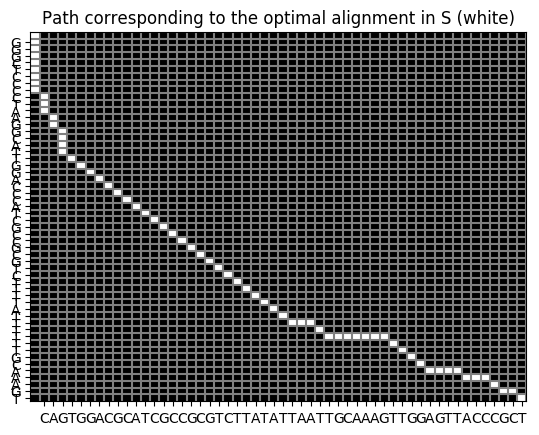

In [256]:
x=[ -0.5+j for i=0:v+1, j=0:u+1 ]
y=[ v+0.5-i for i=0:v+1, j=0:u+1 ]

pcolormesh(x,y,Path,cmap="gray")
for i in 0:1:v
    axvline(x=i+0.5,c=[0.5,0.5,0.5])
    axhline(y=i+0.5,c=[0.5,0.5,0.5])
end
xticks(1:1:v,split(S2,""))
yticks(u-1:-1:0,split(S1,""))
title("Path corresponding to the optimal alignment in S (white)");

## Task 2

#### a) We first want to generalise the deiniftion of pairwise alignment to the case of three sequences u,v and w. 

#### Definition (alignment of three sequences): Let $\mathbf{\Gamma}$ be an alphabet and u,v,w $\mathbf{\in \Gamma}$. Let "-" denote a special character not in $\mathbf{\Gamma}$ called the gap-character. We call u',v',w' $\mathbf{\in (\Gamma \cup}$ {-}$\mathbf{)}$ an alignment of three sequences if and only if: 

#### (i)    |u'|=|v'|=|w'|
#### (ii)   Removing all occurences of "-" from u' leads to u
#### (iii)  Removing all occurences of "-" from v' leads to v
#### (iv)  Removing all occurences of "-" from w' leads to w

#### b) We now want to generalise the definition of scoring matrix to the case of three sequences.

#### Definition (scoring matrix): Let $\mathbf{\Gamma}$ be an alphabet. Let $\mathbf{\Gamma^*}$ denote $\mathbf{\in (\Gamma \cup}$ {-}$\mathbf{)}$. We call any function $\mathbf{\delta: \Gamma^* \times \Gamma^* \times \Gamma^* \rightarrow \mathbb{R}}$ a scoring matrix (or scoring function).

#### c) Based on the two definitions given above, we now want to formulate a generalised Needleman-Wunsch algorithm for the case of three sequences. The main thing we have to remember is that instead of having two possible direction to move in, we now have 7 as we can decide to use charakters from one, two or three strings and insert gaps in one or two strings.

#### Definition (Generalised Needleman-Wunsch algorithm for three sequences): Let $\mathbf{\Gamma}$ be an alphabet, $\mathbb{u,v,w \in \Gamma}$ and $\mathbb{\delta}$ any scoring function. The Generalised Needleman-Wunsch algorithm for three sequences computes $\mathbf{S(i,j,k) \in \mathbb{R}}$ for all i=0,...|u|, all j=0,...,|v| and all k=0,...,|w| as follows:


```python
(i)   S(0,0,0)=0
(ii)  for i=1,...,|u|: S(i,0,0)=S(i-1,0,0)+ δ(u_i,-,-)
(iii) for j=1,...,|v|: S(0,j,0)= S(0,j-1,0)+ δ(-,v_j,-)
(iv)  for k=1,...,|w|: S(0,0,k) = S(0,0,k-1)+ δ(-,-,w_k)
            
            
(v) for i=1,...,|u|
            for j=1,...,|v|
                  for k=1,...,|w|
                        S(i,j,k)=max{S(i-1,j-1,k-1)+ δ(u_i,v_j,w_k)   #take character from all 3
                                     S(i,j-1,k-1)+δ(-,v_j,w_k)        # take character from w,v ; gap in u
                                     S(i-1,j,k-1)+δ(u_i,-,w_k)       # take character from u,w ; gap in v
                                     S(i-1,j-1,k)+δ(u_i,v_j,-)       # take character from u,v ; gap in w
                                     S(i,j,k-1)+δ(-,-,w_k)           # take character from w ; gap in u,v
                                     S(i,j-1,k)+δ(-,v_j,-)           # take character from v ; gap u,w
                                     S(i-1,j,k)+δ(u_i,-,-)}          # take character from u ; gap v,w
                        
```

## Task 3

#### In this question we implement the Neighbour-Joining Algorithm and apply it to the distance matrix given on the questionsheet to compute a phylogenetic tree.  First we input the matrix and initialise a tree consisting of the nodes we want to merge using the algorithm. We use M as an upper triangle matrix to save computational effort and adapt the algorithm slightly in some places to accomodate that. Detailed descriptions can be found as comments in the code.

In [15]:
using TikzGraphs
using LightGraphs
using TikzPictures

In [27]:
#### input the matrix 
M=[[0 34 41 25 33 43 11 20 36 34]; [0 0 51 35 19 53 37 52 46 44]; [0 0 0 32 50 50 44 59 15 25]; [0 0 0 0 34 22 28 43 27 25]; [0 0 0 0 0 52 36 51 45 43]; [0 0 0 0 0 0 46 61 45 43]; [0 0 0 0 0 0 0 29 39 37]; [0 0 0 0 0 0 0 0 54 52]; [0 0 0 0 0 0 0 0 0 20];[0 0 0 0 0 0 0 0 0 0] ]
labels=["A" "B" "C" "D" "E" "F" "G" "H" "I" "J"];

In [28]:
##### initialise the tree
n=size(M)[1]
g = Graph(n)
Nodelab=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
Edges=Dict()
TikzGraphs.plot(g, Nodelab,node_style="draw, rounded corners, fill=green!10")

#### To run the algorithm we organize part of the code in functions. The first function we define is "NodeMerge" which takes the indices of the rows/columns that should be merged, the matrix M and the size of M as an input and outputs the updated matrix M (of size (n-1,n-1)). The new node corresponds to the first column/row in the new matrix.  Detailed explanation can be found in the code.

In [18]:
function NodeMerge(coord1,coord2,M,n)
    NoC=zeros(n,n-2)                       ## define a matrix that has two less columns than M and delete the columns of 
    counter=1                              ## the nodes we merge
    for j=1:n
        if j != coord1 && j != coord2
            NoC[:,counter]=M[:,j]
            counter=counter+1
        end

    end

    NoR=zeros(n-2,n-2)                    ## define a matrix that is n-2xn-2. Use the matrix NoC 
    counter=1                             ## (only has the columns we want) and delete the rows of 
    for i=1:n                             ## the columns that should be merged. The matrix NoR is now the part of M we 
        if i != coord1 && i != coord2     ## want to keep. We now only need to compute the values of the first
            NoR[counter,:]=NoC[i,:]       ## row / column of the new M.
            counter=counter+1
        end

    end

    MNew=zeros(n-1,n-1)                  ## initialise the new matrix M
    MNew[2:n-1,2:n-1]=NoR                ## transfer the values that we keep

    counter=1
    for i=2:n-1
         if counter==coord1 || counter == coord2    ## make sure we don't use the rows/columns we merged
             counter = counter +1
                 if counter==coord1 || counter == coord2
                 counter = counter +1
                end
         end
    ## Computing the values according to the formula in the algorithm. As we use M as an upper triangle matrix 
    ## to save computational effort we sum up M[i,k]+M[k,i] (for j respectively) to make sure we don't accidentifly
    ## pick the value that is 0. 

        MNew[1,i]=(M[coord1,counter]+M[counter,coord1]+M[counter,coord2]+M[coord2,counter]-M[coord1,coord2])/2
        counter=counter+1
    end
    M=MNew
    return M
end;

#### The next function we define is called "labelmerge". It takes the array of strings "labels", the coordinates of the rows/columns that are to be merged and the size of M as an input and outputs an updated array "labels". This function assigns labels to the new nodes we add such that we can easily trace our steps. It also ensures that we know at all times which column of the distance matrix corresponds to which node.

In [19]:
function labelmerge(labels,coord1,coord2,n)
    i=labels[coord1]
    j=labels[coord2]
    newlabels=Array{String}(1,n-1)
    c="$i$j"            #merge the labels ("A" and "B" become "AB")
    newlabels[1]=c
    counter=1
    for k=2:n-1
        if counter==coord1 || counter == coord2     ## make sure we keep the right labels
         counter = counter +1
             if counter==coord1 || counter == coord2
             counter = counter +1
             else
            end
        end 
            newlabels[k]=labels[counter]
            counter=counter+1
    end
    labels=newlabels
    return labels   
end;

#### Now we define the function "treeupdate". This function is essentially responsible for building the tree such that it can be displayed in an appealing way. This "treeupdate" uses the function "labelmerge". Moreover this function computes the edgeweights according to the formula in the algorithm.

In [82]:
function treeupdate(g,coord1,coord2,labels,Nodelab,n,Edges,M,r)
    add_vertex!(g)   ## add the new node
    c=nv(g)
    a=labels[coord1]
    b=labels[coord2]
    d=find(Nodelab .== a)
    e=find(Nodelab .== b)
    add_edge!(g,d[1],c)  ## add the correct edges
    
    ## To compute the edge weights we compute M[i,j]+M[j,i] to make sure we don't accidentally only use the zero entry
    ## in the sparse matrix.
    
    Edges[d[1],c]=(M[coord1,coord2]+M[coord2,coord1]+((r[coord1]-r[coord2])/(n-2)))/2
    add_edge!(g,e[1],c)
    Edges[e[1],c]=(M[coord1,coord2]+M[coord2,coord1]+(r[coord2]-r[coord1])/(n-2))/2
    labels=labelmerge(labels,coord1,coord2,n)
    push!(Nodelab,labels[1])
    return labels,Nodelab,g,Edges
end;

#### Finally, we define the function "final_edge". The purpose of this is to add the last edge in the right place once the algorithm is finished. Due to the data structure of the tree it isn't trivial where the respective nodes are stored. Therefore it is handy to not do it by hand but have a small function do this last step.

In [21]:
function final_edge(g)
    vertices=[]
    for vertex=1:nv(g)
     d=degree(g, vertex)
        if d==2 || d==0
            append!(vertices, vertex)
        end
    end
    add_edge!(g,vertices[1],vertices[2])
    return vertices
end;

#### Now that we have defined all the necessary functions we can run the algorithm. At every step we display the distance matrix M and the tree at this stage. 

"ROUND 1"

"We're merging B and E"

"The new matrix M is"

9×9 Array{Float64,2}:
 0.0  24.0  41.0  25.0  43.0  27.0  42.0  36.0  34.0
 0.0   0.0  41.0  25.0  43.0  11.0  20.0  36.0  34.0
 0.0   0.0   0.0  32.0  50.0  44.0  59.0  15.0  25.0
 0.0   0.0   0.0   0.0  22.0  28.0  43.0  27.0  25.0
 0.0   0.0   0.0   0.0   0.0  46.0  61.0  45.0  43.0
 0.0   0.0   0.0   0.0   0.0   0.0  29.0  39.0  37.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0  54.0  52.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  20.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

"The columns correspond to the labels in the following order:"

1×9 Array{String,2}:
 "BE"  "A"  "C"  "D"  "F"  "G"  "H"  "I"  "J"

"The tree at this stage:"

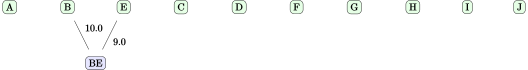

"ROUND 2"

"We're merging C and I"

"The new matrix M is"

8×8 Array{Float64,2}:
 0.0  31.0  31.0  22.0  40.0  34.0  49.0  15.0
 0.0   0.0  24.0  25.0  43.0  27.0  42.0  34.0
 0.0   0.0   0.0  25.0  43.0  11.0  20.0  34.0
 0.0   0.0   0.0   0.0  22.0  28.0  43.0  25.0
 0.0   0.0   0.0   0.0   0.0  46.0  61.0  43.0
 0.0   0.0   0.0   0.0   0.0   0.0  29.0  37.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0  52.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

"The columns correspond to the labels in the following order:"

1×8 Array{String,2}:
 "CI"  "BE"  "A"  "D"  "F"  "G"  "H"  "J"

"The tree at this stage:"

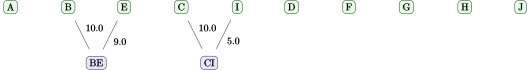

"ROUND 3"

"We're merging CI and J"

"The new matrix M is"

7×7 Array{Float64,2}:
 0.0  25.0  25.0  16.0  34.0  28.0  43.0
 0.0   0.0  24.0  25.0  43.0  27.0  42.0
 0.0   0.0   0.0  25.0  43.0  11.0  20.0
 0.0   0.0   0.0   0.0  22.0  28.0  43.0
 0.0   0.0   0.0   0.0   0.0  46.0  61.0
 0.0   0.0   0.0   0.0   0.0   0.0  29.0
 0.0   0.0   0.0   0.0   0.0   0.0   0.0

"The columns correspond to the labels in the following order:"

1×7 Array{String,2}:
 "CIJ"  "BE"  "A"  "D"  "F"  "G"  "H"

"The tree at this stage:"

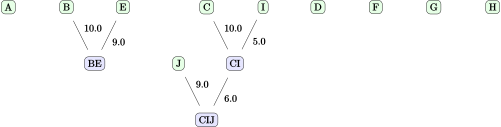

"ROUND 4"

"We're merging D and F"

"The new matrix M is"

6×6 Array{Float64,2}:
 0.0  14.0  23.0  23.0  26.0  41.0
 0.0   0.0  25.0  25.0  28.0  43.0
 0.0   0.0   0.0  24.0  27.0  42.0
 0.0   0.0   0.0   0.0  11.0  20.0
 0.0   0.0   0.0   0.0   0.0  29.0
 0.0   0.0   0.0   0.0   0.0   0.0

"The columns correspond to the labels in the following order:"

1×6 Array{String,2}:
 "DF"  "CIJ"  "BE"  "A"  "G"  "H"

"The tree at this stage:"

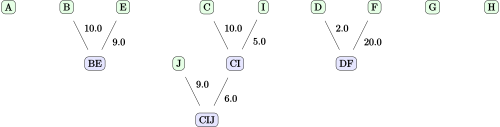

"ROUND 5"

"We're merging DF and CIJ"

"The new matrix M is"

5×5 Array{Float64,2}:
 0.0  17.0  17.0  20.0  35.0
 0.0   0.0  24.0  27.0  42.0
 0.0   0.0   0.0  11.0  20.0
 0.0   0.0   0.0   0.0  29.0
 0.0   0.0   0.0   0.0   0.0

"The columns correspond to the labels in the following order:"

1×5 Array{String,2}:
 "DFCIJ"  "BE"  "A"  "G"  "H"

"The tree at this stage:"

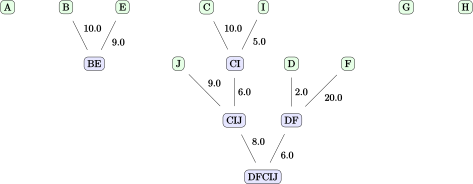

"ROUND 6"

"We're merging DFCIJ and BE"

"The new matrix M is"

4×4 Array{Float64,2}:
 0.0  12.0  15.0  30.0
 0.0   0.0  11.0  20.0
 0.0   0.0   0.0  29.0
 0.0   0.0   0.0   0.0

"The columns correspond to the labels in the following order:"

1×4 Array{String,2}:
 "DFCIJBE"  "A"  "G"  "H"

"The tree at this stage:"

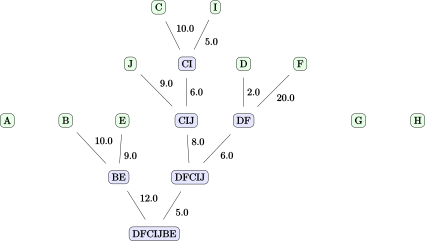

"ROUND 7"

"We're merging DFCIJBE and G"

"The new matrix M is"

3×3 Array{Float64,2}:
 0.0  4.0  22.0
 0.0  0.0  20.0
 0.0  0.0   0.0

"The columns correspond to the labels in the following order:"

1×3 Array{String,2}:
 "DFCIJBEG"  "A"  "H"

"The tree at this stage:"

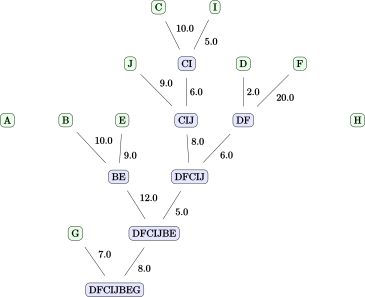

"ROUND 8"

"We're merging DFCIJBEG and A"

"The new matrix M is"

2×2 Array{Float64,2}:
 0.0  19.0
 0.0   0.0

"The columns correspond to the labels in the following order:"

1×2 Array{String,2}:
 "DFCIJBEGA"  "H"

"The tree at this stage:"

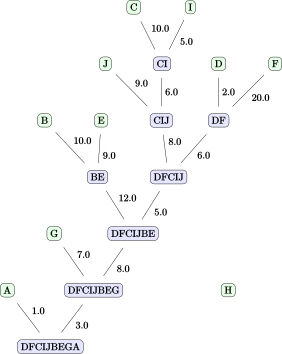

In [29]:
round=1
while n>2
    display("ROUND $round")
    #### STEP 1: get the nodes that should merge
    r=zeros(n)
    
    ## To compute the r's we here have to not only sum over the row but over the row and the column as we store M 
    ## as an upper triangle matrix.
    
    for i = 1:n
        r[i]=sum(M[i,:])+ sum(M[:,i])
    end

    Mini=[0,0]
    MinStart=M[1,2]-((r[1]+r[2])/(n-2))    
    coord=[1,2]
    ## In this code the minimum is only updated if the new values is truely smaller (<). Therefore, if there are multiple
    ## minima my code will always keep the first minimum (important for the merge).
    for i=1:n
        for j=i+1:n
            Mini=M[i,j]-((r[i]+r[j])/(n-2))
            if MinStart > Mini
                MinStart=Mini
                coord=[i,j]
            end
        end
    end

    str1=labels[coord[1]]
    str2=labels[coord[2]]
    display("We're merging $str1 and $str2")

    #### STEP 2: merge them 
    labels,Nodelab,g,Edges=treeupdate(g,coord[1],coord[2],labels, Nodelab,n,Edges,M,r) ## use "treepupdate"
    M=NodeMerge(coord[1],coord[2],M,n)                                                 ## use "NodeMerge"
    display("The new matrix M is")
    display(M)
    display("The columns correspond to the labels in the following order:")
    display(labels)
    display("The tree at this stage:")
    display(TikzGraphs.plot(g, Nodelab,edge_labels=Edges,node_style="draw, rounded corners, fill=blue!10", node_styles=Dict(1=>"fill=green!10",2=>"fill=green!10",3=>"fill=green!10",4=>"fill=green!10",5=>"fill=green!10",6=>"fill=green!10",7=>"fill=green!10",8=>"fill=green!10",9=>"fill=green!10",10=>"fill=green!10"),options="scale=2")
    )
    n=n-1
    round=round+1
end

#### We now add in the final edge and get the final phylogenetic tree.

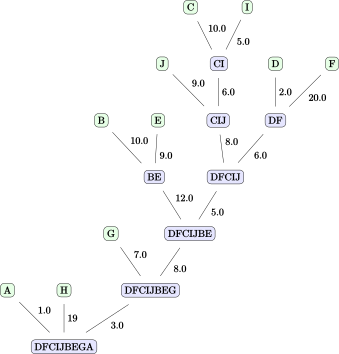

In [30]:
vertices=final_edge(g)
Edges[vertices[1],vertices[2]]=19
TikzGraphs.plot(g, Nodelab,edge_labels=Edges,node_style="draw, rounded corners, fill=blue!10", node_styles=Dict(1=>"fill=green!10",2=>"fill=green!10",3=>"fill=green!10",4=>"fill=green!10",5=>"fill=green!10",6=>"fill=green!10",7=>"fill=green!10",8=>"fill=green!10",9=>"fill=green!10",10=>"fill=green!10"),options="scale=2")

## Task 4

#### In this task we draw a simple suffix tree for the string 
$$\mathbf{w=CACAATCATACAACTGGGGA}$$
#### We add the end character \$  to the sequence. The path that is traversed to test whether TCATACTT is a substring of w is highlighted in green. TCATACTT is not a substring of w.

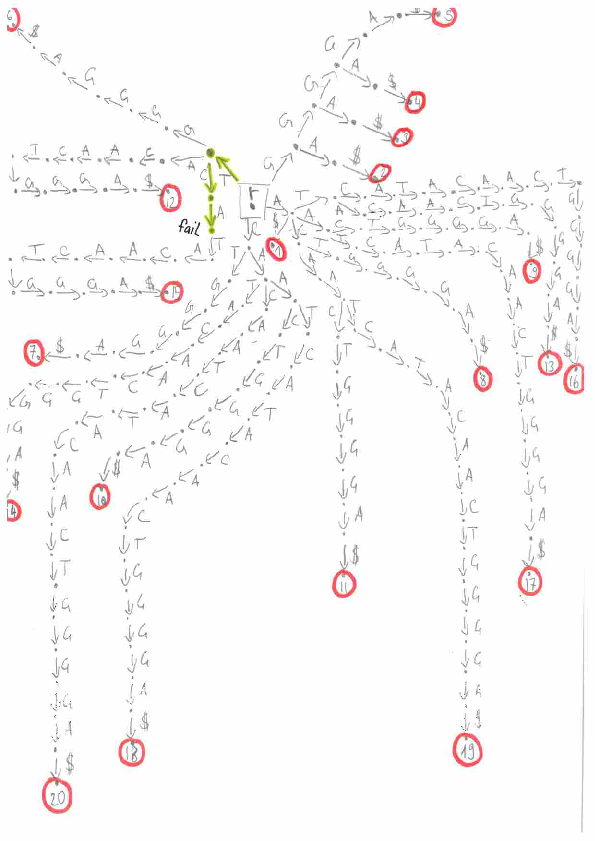

In [29]:
using FileIO
img = load("suffix-tree.pdf")

## Task 5

#### In this question we want to combine our implementations of Task 1 and Task 3 to perform the first two steps of the CLUSTAL algorithm. We will run this program on coding gene sequences from ten different species for three different genes which were retrieved from the website https://grch37.ensembl.org/index.html which is an archive based on Ensembl Release 75 data. I will first present the code and then move on to talking about the genes and the results the algorithm gave us.

### CLUSTALW for multiple sequence alignment

#### We assume we have an array of sequences (in our case obtained from different species and therefore called Mspecies). First we want to compute all pairwise alignments using the same scoring function as in Task 1. To do that we use the code from Task 1. Once we have the optimal alignment score we need to measure the length of the alignment.  As we have the function "Pathfinder" which gives us the optimal alignment we can also use that to get the length of the optimal alignment N. We then compute the values in the distance matrix according to the formula (N-S)/N. As our implementation of the Neighbour-Joining Algorithm uses an upper triangle matrix we only have to compute upper triangle entries here. As we want to use the code for multiple genes/species we organise it in a function.

In [49]:
function Clustalsequence(species)  ## Input: array of sequences
Mspecies=zeros(length(species),length(species))   ##intialise the distance matrix

########################################### CODE EXACTLY LIKE TASK 1
for run=1:length(species)
    S1=species[run]
    for run2=run+1:length(species)
        S2=species[run2]
        u=length(S1)   ###u is the length of S1
        v=length(S2)   ### v is the length of S2

        S=zeros(u+1,v+1)  ### initiate the scoring matrix, dimensions u+1,v+1 (as we need to consider the "empty" entry)
        Trace=zeros(u+1,v+1)   ### initiate the Trace matrix
        Trace[1,:]=3     ### set the first row to be "right" (as right is the only possibility to reach these entries)
        Trace[:,1]=2     ### set the first column to be "down" (as down is the only possibility to reach these entries)
        S[1,1]=0        ### set the first diagonal element of the scoring matrix to be 0


        # The idices are slightly different from the algorithm in the lecture due to the reason that julia starts to index at 1 
        # and not at 0. Also we have a spare row in the matrix but not in the sequence.

        for i=2:u+1
            S[i,1]=S[i-1,1]+score(S1[i-1],'-')
        end 

        for j=2:v+1
            S[1,j]=S[1,j-1]+score('-',S2[j-1])
        end 

        for i=2:u+1
            for j=2:v+1
                S[i,j]=max(S[i-1,j-1]+score(S1[i-1],S2[j-1]), S[i-1,j]+score(S1[i-1],'-'),S[i,j-1]+score('-',S2[j-1]))
                if S[i,j]==S[i-1,j-1]+score(S1[i-1],S2[j-1])
                    Trace[i,j]=1
                elseif S[i,j]==S[i-1,j]+score(S1[i-1],'-')             ##1=diag, 2=down, 3=right
                    Trace[i,j]=2
                    else Trace[i,j]=3
                end
            end
        end

##############################################
        AlignmentScore=S[u+1,v+1]   ## Get the alignment score 
        Alignment=Pathfinder(u,v,S1,S2,Trace)   ## compute the optimal alignment
        N=length(Alignment[1])                  ## get its length
        Mspecies[run,run2]=(N-AlignmentScore)/N  ## compute the distance 
    end
end
       return Mspecies    ### output the distance matrix
end;

#### Now that we have the distance matrix we run our code from Task 3 to build the phylogenetic tree. We use all the same function but slightly adapt it as we're only interested in the final result this time and don't want to see all the intermediate steps. We also decide to only label the leaves. As above we also organise this code in a function.

In [60]:
function Clustaltree(M)
n=size(M)[1]
g = Graph(n)
Nodelab=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
labels= ["A" "B" "C" "D" "E" "F" "G" "H" "I" "J"]
Edges=Dict()
while n>2
    r=zeros(n)    
    for i = 1:n
        r[i]=sum(M[i,:])+ sum(M[:,i])
    end
    Mini=[0,0]
    MinStart=M[1,2]-((r[1]+r[2])/(n-2))    
    coord=[1,2]
    for i=1:n
        for j=i+1:n
            Mini=M[i,j]-((r[i]+r[j])/(n-2))
            if MinStart > Mini
                MinStart=Mini
                coord=[i,j]
            end
        end
    end
    labels,Nodelab,g,Edges=treeupdate(g,coord[1],coord[2],labels, Nodelab,n,Edges,M,r) ## use "treepupdate"
    M=NodeMerge(coord[1],coord[2],M,n)                                                 ## use "NodeMerge"
    n=n-1
end
    return g, Edges
end;

### INSR gene

#### The first gene we want to run our algorithm on is the INSR gene. The INSR gene provides instructions for making a protein called an insulin receptor, which is found in many types of cells. We look at the coding gene sequence for the following species:
$$ \mathbf{human, squirrel, sheep, rat, rabbit, panda, orangutan, horse, elephant, dog}$$

#### The first step is to preprocess the data (as julia reads newlines as characters when importing text files). We then define the array "species" containing all the sequences and apply our functions described above to receive the phylogenetic tree. 

In [37]:
human=readstring(open("INSR-human.txt"))
human = replace(human, '\n', ' ');
human=filter(x -> !isspace(x), human);

In [38]:
squirrel=readstring(open("INSR-squirrel.txt"))
squirrel = replace(squirrel, '\n', ' ');
squirrel=filter(x -> !isspace(x), squirrel);

In [39]:
sheep=readstring(open("INSR-sheep.txt"))
sheep = replace(sheep, '\n', ' ');
sheep=filter(x -> !isspace(x), sheep);

In [40]:
rat=readstring(open("INSR-rat.txt"))
rat = replace(rat, '\n', ' ');
rat=filter(x -> !isspace(x), rat);

In [41]:
rabbit=readstring(open("INSR-rabbit.txt"))
rabbit = replace(rabbit, '\n', ' ');
rabbit=filter(x -> !isspace(x), rabbit);

In [42]:
panda=readstring(open("INSR-panda.txt"))
panda = replace(panda, '\n', ' ');
panda=filter(x -> !isspace(x), panda);

In [43]:
orangutan=readstring(open("INSR-orangutan.txt"))
orangutan = replace(orangutan, '\n', ' ');
orangutan=filter(x -> !isspace(x), orangutan);

In [44]:
horse=readstring(open("INSR-horse.txt"))
horse = replace(horse, '\n', ' ');
horse=filter(x -> !isspace(x), horse);

In [45]:
elephant=readstring(open("INSR-elephant.txt"))
elephant = replace(elephant, '\n', ' ');
elephant=filter(x -> !isspace(x), elephant);

In [46]:
dog=readstring(open("INSR-dog.txt"))
dog = replace(dog, '\n', ' ');
dog=filter(x -> !isspace(x), dog);

In [54]:
species=[human, squirrel, sheep, rat, rabbit, panda, orangutan, horse, elephant, dog];

In [55]:
INSRM=Clustalsequence(species)

LoadError: [91mUndefVarError: n not defined[39m

In [111]:
INSRg, INSRedges= Clustaltree(INSRM);
final_edge(INSRg);

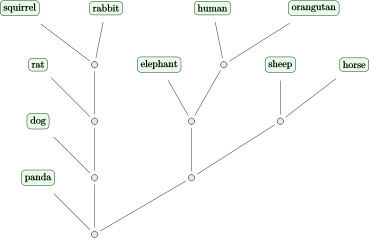

In [112]:
INSR_labels=["human", "squirrel", "sheep", "rat","rabbit", "panda", "orangutan", "horse", "elephant", "dog","","","","","","","",""]
display(TikzGraphs.plot(INSRg, INSR_labels,node_style="draw, rounded corners, fill=blue!10", node_styles=Dict(1=>"fill=green!10",2=>"fill=green!10",3=>"fill=green!10",4=>"fill=green!10",5=>"fill=green!10",6=>"fill=green!10",7=>"fill=green!10",8=>"fill=green!10",9=>"fill=green!10",10=>"fill=green!10"),options="scale=2")
)

#### We display the tree without the edge weigts to get a better overview (as the edge weights are very long decimal numbers). The phylogenetic tree received based on the INSR sequence analysis seems to be consistent with the known evolutionary relationships of the species. 

### EGFR gene

#### The second gene we run our algorithm on is the EGFR gene. The protein encoded by this gene is a transmembrane glycoprotein that is a member of the protein kinase superfamily. This protein is a receptor for members of the epidermal growth factor family.  We look at the coding gene sequence for the following species:
$$ \mathbf{human, anole lizard, cat, chicken, chimpanzee, flycatcher, guinea pig, tasmanian devil, turkey, oppossum}$$

#### Note that this time we don't only consider mammals but also birds and reptiles. 

In [85]:
human=readstring(open("EGFR-human.txt"))
human=replace(human,'\n',' ')
human=filter(x -> !isspace(x),human);

In [86]:
anolelizard=readstring(open("EGFR-anole-lizard.txt"))
anolelizard=replace(anolelizard,'\n',' ')
anolelizard=filter(x -> !isspace(x),anolelizard);

In [88]:
cat=readstring(open("EGFR-cat.txt"))
cat=replace(cat,'\n',' ')
cat=filter(x -> !isspace(x),cat);

In [89]:
chicken=readstring(open("EGFR-chicken.txt"))
chicken=replace(chicken,'\n',' ')
chicken=filter(x -> !isspace(x),chicken);

In [90]:
flycatcher=readstring(open("EGFR-flycatcher.txt"))
flycatcher=replace(flycatcher,'\n',' ')
flycatcher=filter(x -> !isspace(x),flycatcher);

In [91]:
guineapig=readstring(open("EGFR-guinea-pig.txt"))
guineapig=replace(guineapig,'\n',' ')
guineapig=filter(x -> !isspace(x),guineapig);

In [92]:
tasmaniandevil=readstring(open("EGFR-tasmanian-devil.txt"))
tasmaniandevil=replace(tasmaniandevil,'\n',' ')
tasmaniandevil=filter(x -> !isspace(x),tasmaniandevil);

In [93]:
turkey=readstring(open("EGFR-turkey.txt"))
turkey=replace(turkey,'\n',' ')
turkey=filter(x -> !isspace(x),turkey);

In [94]:
oppossum=readstring(open("EGFR-oppossum.txt"))
oppossum=replace(oppossum,'\n',' ')
oppossum=filter(x -> !isspace(x),oppossum);

In [95]:
gorilla=readstring(open("EGFR-gorilla.txt"))
gorilla=replace(gorilla,'\n',' ')
gorilla=filter(x -> !isspace(x),gorilla);

In [97]:
species=[human,anolelizard,cat,chicken,flycatcher,guineapig,tasmaniandevil,turkey,oppossum,gorilla];

In [98]:
EGFRM=Clustalsequence(species)

10×10 Array{Float64,2}:
 0.0  0.396834  0.242629  0.36205   …  0.360323   0.324884  0.193229
 0.0  0.0       0.331486  0.289927     0.25793    0.316083  0.310249
 0.0  0.0       0.0       0.271725     0.290966   0.211029  0.150536
 0.0  0.0       0.0       0.0          0.0756588  0.259289  0.299515
 0.0  0.0       0.0       0.0          0.126964   0.299946  0.281128
 0.0  0.0       0.0       0.0       …  0.304478   0.260033  0.196757
 0.0  0.0       0.0       0.0          0.331955   0.209382  0.294396
 0.0  0.0       0.0       0.0          0.0        0.284223  0.262163
 0.0  0.0       0.0       0.0          0.0        0.0       0.248564
 0.0  0.0       0.0       0.0          0.0        0.0       0.0     

In [109]:
EGFRg, EGFRedges= Clustaltree(EGFRM);
final_edge(EGFRg);

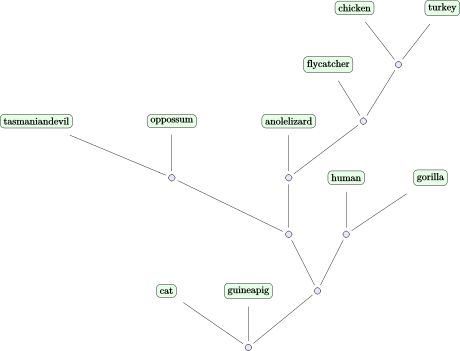

In [110]:
EGFR_labels=["human","anolelizard","cat","chicken","flycatcher","guineapig","tasmaniandevil","turkey","oppossum", "gorilla","","","","","","","",""]
display(TikzGraphs.plot(EGFRg, EGFR_labels,node_style="draw, rounded corners, fill=blue!10", node_styles=Dict(1=>"fill=green!10",2=>"fill=green!10",3=>"fill=green!10",4=>"fill=green!10",5=>"fill=green!10",6=>"fill=green!10",7=>"fill=green!10",8=>"fill=green!10",9=>"fill=green!10",10=>"fill=green!10"),options="scale=2")
)

#### We display the tree without the edge weigts to get a better overview (as the edge weights are very long decimal numbers). The phylogenetic tree received based on the EGFR sequence analysis seems to be consistent with the known evolutionary relationships of the species. 

### TP53 Gene

#### The last gene we look at is TP53. This gene encodes a tumor suppressor protein containing transcriptional activation, DNA binding, and oligomerization domains. The encoded protein responds to diverse cellular stresses to regulate expression of target genes, thereby inducing cell cycle arrest, apoptosis, senescence, DNA repair, or changes in metabolism. I was interested in looking at TP53 because it is one of the most studied genes in history. We look at the coding gene sequence for the following species:
$$ \mathbf{human, dolphin, dog, cod, gibbon, macaque, pike, platyfish, shrew, wallaby}$$

In [113]:
human=readstring(open("TP53-human.txt"))
human=replace(human,'\n',' ')
human=filter(x -> !isspace(x),human);

In [114]:
dolphin=readstring(open("TP53-dolphin.txt"))
dolphin=replace(dolphin,'\n',' ')
dolphin=filter(x -> !isspace(x),dolphin);

In [115]:
dog=readstring(open("TP53-dog.txt"))
dog=replace(dog,'\n',' ')
dog=filter(x -> !isspace(x),dog);

In [116]:
cod=readstring(open("TP53-cod.txt"))
cod=replace(cod,'\n',' ')
cod=filter(x -> !isspace(x),cod);

In [117]:
gibbon=readstring(open("TP53-gibbon.txt"))
gibbon=replace(gibbon,'\n',' ')
gibbon=filter(x -> !isspace(x),gibbon);

In [118]:
macaque=readstring(open("TP53-macaque.txt"))
macaque=replace(macaque,'\n',' ')
macaque=filter(x -> !isspace(x),macaque);

In [119]:
pika=readstring(open("TP53-pika.txt"))
pika=replace(pika,'\n',' ')
pika=filter(x -> !isspace(x),pika);

In [120]:
platyfish=readstring(open("TP53-platyfish.txt"))
platyfish=replace(platyfish,'\n',' ')
platyfish=filter(x -> !isspace(x),platyfish);

In [121]:
shrew=readstring(open("TP53-shrew.txt"))
shrew=replace(shrew,'\n',' ')
shrew=filter(x -> !isspace(x),shrew);

In [122]:
wallaby=readstring(open("TP53-wallaby.txt"))
wallaby=replace(wallaby,'\n',' ')
wallaby=filter(x -> !isspace(x),wallaby);

In [123]:
species=[human,dolphin,dog,cod,gibbon,macaque,pika,platyfish,shrew,wallaby];

In [124]:
TP53=Clustalsequence(species)

10×10 Array{Float64,2}:
 0.0  0.525738  0.560302  0.613662  0.439086  …  0.600659  0.558873  0.620159
 0.0  0.0       0.158703  0.742281  0.16091      0.491575  0.171514  0.718026
 0.0  0.0       0.0       0.732669  0.211715     0.492747  0.211358  0.715338
 0.0  0.0       0.0       0.0       0.75654      0.642166  0.745064  0.413352
 0.0  0.0       0.0       0.0       0.0          0.512428  0.210681  0.734772
 0.0  0.0       0.0       0.0       0.0       …  0.510753  0.209664  0.734823
 0.0  0.0       0.0       0.0       0.0          0.477056  0.268209  0.713528
 0.0  0.0       0.0       0.0       0.0          0.0       0.486853  0.68151 
 0.0  0.0       0.0       0.0       0.0          0.0       0.0       0.722985
 0.0  0.0       0.0       0.0       0.0          0.0       0.0       0.0     

In [131]:
TP53g, TP53edges= Clustaltree(TP53);
final_edge(TP53g);

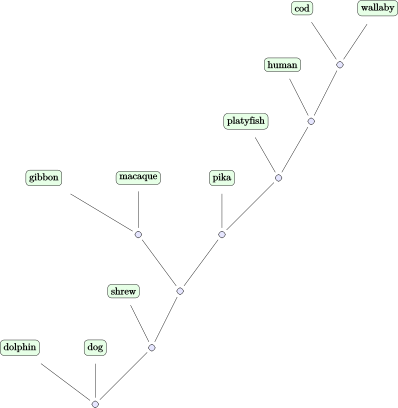

In [134]:
TP53_labels=["human","dolphin","dog","cod","gibbon","macaque","pika","platyfish","shrew","wallaby","","","","","","","",""]
display(TikzGraphs.plot(TP53g, TP53_labels,node_style="draw, rounded corners, fill=blue!10", node_styles=Dict(1=>"fill=green!10",2=>"fill=green!10",3=>"fill=green!10",4=>"fill=green!10",5=>"fill=green!10",6=>"fill=green!10",7=>"fill=green!10",8=>"fill=green!10",9=>"fill=green!10",10=>"fill=green!10"),options="scale=2")
)

In [136]:
println("distances human <-> other species:")
TP53[1,:]

distances human <-> other species:


10-element Array{Float64,1}:
 0.0     
 0.525738
 0.560302
 0.613662
 0.439086
 0.434856
 0.580085
 0.600659
 0.558873
 0.620159

#### This tree is not consistent with known evolutionary relationships of the species (human and platyfish, cod and wallaby). A possible reason for this gene to work a lot less well than INSR and EGFR is that the coding gene sequence for the protein here is a lot shorter than for the other examples. Short sequences are less distinctive and it is more likely that some species aren't necessarily closely related but only have a similar sequence by luck. Furthermore, looking at the distance matrix, the distances here are a lot more varying than in the other cases. Looking at the species "human" for example, it has a (relatively) high distance to all of the other species, the lowest one to gibbon and macaque . In the algorithm human is still placed somewhere else as the other specise are closer. Overall the reasons for this phylogenetic tree to be not consistent could be:

#### - very short coding gene sequence
#### - very varying number of species (large distances)
#### - the gene is not suitable for evolutionary analysis (very old etc.)

#### Sources used for information about the genes:
http://www.genecards.org

## Task 6

In [2]:
using Distributions;
using Gadfly;
using Discretizers;

#### In this question we will use the single-cell gene expression data provided on the module webpage. We will calculate the similarities of all pairs of cells in the high-dimensional as well and in the low-dimensional space and present an assessment method to assess how well cells have been placed. First we import the data and do some preprocessing, i.e. cutting out the column labels and the gene sequence strings in the high dimensional data set. We also convert the data into a float datatype so that it is easier to handle for build in functions.

In [3]:
HighDim=readcsv("scRNA-seq-data.csv")   ### high dimensional data
HighDim=view(HighDim,2:501,2:21)
for i=1:20
convert(Array{Float64,1},HighDim[:,i]);
end

In [4]:
TSne=readcsv("t-SNE-coordinates-and-sigmas.csv")   ### low dimensional data
TSne=view(TSne,2:501,1:3)
for i=1:3
convert(Array{Float64,1},TSne[:,i]);
end

#### We compute the similarity of the high dimensional data using the following formulas:
$$ \mathbf{P_{j|i}=\frac{\exp(-||x_i-x_j||^2/ 2\sigma_i^2)}{\sum_{k \neq i}{\exp(-||x_i-x_k||^2/ 2\sigma_i^2)}}}$$

$$ \mathbf{P_{i,j}=\frac{P_{i|j}+P_{j|i}}{2N}}$$

#### where N is the number of cells and $\mathbf{\sigma_i}$ is the bandwidth of the ith gaussian kernel. The norm we're using is the euclidean distance. 

In [8]:
function eucdist(a,b)   ### function that computes the euclidean distance
   d=sqrt(sum((a-b).^2))
    return d
end;

In [9]:
#### compute highdim similarities
cells=length(HighDim[:,1])  ### cells = number of cells
CondProb=zeros(cells,cells)
for i=1:cells                             #### CondProb[i,j]= P_{j|i}
    b=0
    for k=1:cells
        if k != i
            b=b+exp((-(eucdist(HighDim[i,:],HighDim[k,:])^2))/(2*(TSne[i,3])^2))  ### compute the denominator
        end
    end
    for j=1:cells
        if j != i
        a=exp((-(eucdist(HighDim[i,:],HighDim[j,:])^2))/(2*(TSne[i,3])^2))      ### compute the numerator
        CondProb[i,j]= a/b                                                      ### compute the formula
        end
    end
end

In [11]:
P=zeros(cells,cells)            #### compute P using CondProb (whose entries correspond to P_{j|i} and P_{i|j})
for i=1:cells
    for j=1:cells
        P[i,j]=(CondProb[i,j]+CondProb[j,i])/(2*cells)
    end
end
display(P)

500×500 Array{Float64,2}:
 0.0         4.07813e-6  3.63857e-6  …  4.00827e-6  4.0083e-6   4.00836e-6
 4.07813e-6  0.0         2.21474e-6     3.9814e-6   4.01757e-6  4.01354e-6
 3.63857e-6  2.21474e-6  0.0            3.79588e-6  3.86526e-6  3.5092e-6 
 4.00844e-6  4.17009e-6  3.68779e-6     4.00837e-6  4.00852e-6  4.00845e-6
 4.11189e-6  2.43607e-6  8.22076e-6     3.90191e-6  3.99029e-6  3.98814e-6
 2.45567e-6  1.57173e-6  0.00010979  …  2.45189e-6  2.4386e-6   2.34508e-6
 4.00843e-6  4.05053e-6  3.63848e-6     4.00825e-6  4.00828e-6  4.00836e-6
 4.04191e-6  4.41012e-6  3.06279e-6     4.04086e-6  4.02432e-6  4.01567e-6
 4.00827e-6  4.15759e-6  3.63458e-6     4.00818e-6  4.00831e-6  4.0084e-6 
 4.0287e-6   4.25329e-6  2.86963e-6     4.02527e-6  4.02217e-6  4.01278e-6
 4.03996e-6  4.41963e-6  3.19637e-6  …  4.03488e-6  4.01796e-6  4.01448e-6
 4.00825e-6  4.05744e-6  3.69482e-6     4.0082e-6   4.00834e-6  4.0084e-6 
 4.00832e-6  4.0367e-6   3.63986e-6     4.00822e-6  4.00829e-6  4.00834e-6

#### Next we compute the similarity of the low dimensional data that was generated using the TSne algorithm. To do that we use the following formula: 
$$ \mathbf{q_{i,j}=\frac{(1+||y_i-y_j||^2)^{-1}}{\sum_{k}{\sum_{l \neq k}{(1+||y_k-y_l||^2)^{-1}}}}}$$

In [13]:
Q=zeros(cells,cells)

b=zeros(cells)
for k=1:cells
    for l=1:cells
        if l != k
        b[k]=b[k]+(1/(1+(eucdist(TSne[k,:],TSne[l,:]))^2))   ### compute the denominator
        end
    end
end
b=sum(b)

for i=1:cells
    for j=1:cells
        if j != i
           a=1/(1+(eucdist(TSne[i,:],TSne[j,:]))^2)         ### compute the numerator
           Q[i,j]=a/b                                       ### compute the fraction
        end
    end
end

display(Q)

500×500 Array{Float64,2}:
 0.0         7.32139e-9  6.98762e-9   …  9.10631e-7  7.94541e-8  9.77734e-8
 7.32139e-9  0.0         4.06213e-6      6.20338e-9  1.50458e-8  1.38316e-8
 6.98762e-9  4.06213e-6  0.0             5.94506e-9  1.41011e-8  1.30042e-8
 1.68688e-7  1.16778e-8  1.10027e-8      8.40735e-8  7.74483e-7  1.51492e-6
 7.04398e-9  4.41378e-6  0.00034663      5.98976e-9  1.42645e-8  1.3148e-8 
 6.9332e-9   3.57698e-6  0.000438108  …  5.90242e-9  1.39457e-8  1.28666e-8
 6.90705e-7  9.09723e-9  8.63772e-9      2.0135e-7   1.81458e-7  2.5066e-7 
 7.70281e-9  1.15954e-5  1.9841e-6       6.49988e-9  1.61865e-8  1.48343e-8
 3.22512e-8  3.35964e-9  3.25621e-9      4.81172e-8  1.20657e-8  1.30431e-8
 8.04919e-9  3.11493e-6  1.12507e-6      6.76324e-9  1.72371e-8  1.57657e-8
 7.74391e-9  9.52689e-6  1.84954e-6   …  6.53168e-9  1.63116e-8  1.4944e-8 
 2.94838e-8  3.262e-9    3.16252e-9      4.31126e-8  1.14108e-8  1.23082e-8
 7.33036e-8  4.22798e-9  4.08079e-9      1.37868e-7  1.91085e-

#### If the map points $\mathbf{y_i}$ and $\mathbf{y_j}$ correctly model the similarity between the high-dimensional data-points $\mathbf{x_i}$ and $\mathbf{x_j}$, the conditional probabilities $\mathbf{p_{i,j}}$  and $\mathbf{q_{i,j}}$ will be equal. To get the coordinates provided here, the TSNE algorithm minimised the sum of the Kullbeck-Leibler divergence over all data points: 
$$ \mathbf{KL(P||Q)=\sum_i{\sum_{i \neq j}{P_{i,j}\log{\frac{P_{i,j}}{q_{i,j}}}}}}$$

#### So, for optimally placed data points, the contribution to the sum of the Kullbeck-Leibler divergences will be zero. By assessing which magnitude the individual cells contribute to the Kullbeck-Leibler divergence we can therefore assess the quality of the placement. Optimally placed cells won't contribute to the sum at all whereas moderately or badly placed cells will contribute larger values. We therefore now compute the Kullbeck-Leibler divergence according to the formula above but we consider the individual elements of the sum. 

In [15]:
### Kullback Leibler divergence, contribution to the sum per cell

K=zeros(cells)
for i=1:cells
    for j=1:cells
        if j != i
            K[i]=K[i]+P[i,j]*log(P[i,j]/Q[i,j])
        end
    end
end
display(K)

500-element Array{Float64,1}:
 0.00835044
 0.0114496 
 0.00863894
 0.00932743
 0.0111288 
 0.00399693
 0.00870055
 0.0115248 
 0.00810319
 0.0115642 
 0.011527  
 0.00823178
 0.00767867
 ⋮         
 0.00769428
 0.00777974
 0.00836407
 0.010583  
 0.00879871
 0.0092774 
 0.00832519
 0.00929221
 0.00890905
 0.00801656
 0.00981201
 0.00961809

#### We now plot the low dimensional data in 2D with the color corresponding to the magnitude the cells contribute to the sum of the Kullbeck-Leibler divergences and therefore to the quality of the cells placement. The lower the color index the better the placement of the cell. 

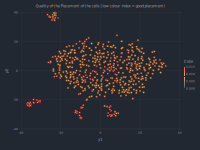

In [22]:
draw(SVG(20cm, 15cm), plot(x=TSne[:,1], y=TSne[:,2],color=K,Guide.title("Quality of the Placement of the cells (low colour index = good placement)"),Guide.xlabel("y1"),Guide.ylabel("y2")))

#### The plot suggests that hardly any of the cells are optimally placed. Most cells reach a value between 0.005 and 0.010. Some cells reach values up to 0.015. Even though these values are all still close to zero, it suggests that some cells are placed three times worse than others. Interestingly some of the worst placements are found in small seperate clusters (bottom left, middle, right).  

In [27]:
data  = K
edges = binedges(DiscretizeUniformWidth(2), data)
lindisc=LinearDiscretizer(edges)
labels=encode(lindisc,K)

500-element Array{Int64,1}:
 1
 2
 2
 2
 2
 1
 2
 2
 1
 2
 2
 1
 1
 ⋮
 1
 1
 1
 2
 2
 2
 1
 2
 2
 1
 2
 2

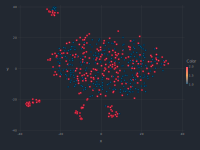

In [28]:
draw(SVG(20cm, 15cm), plot(x=TSne[:,1], y=TSne[:,2],color=labels))